# Recipe Reviews and User Feedback 

#### Author: Geovanny 

#### Exploratory Data Analysis

In [1]:
# Import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geova\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geova\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('../data/raw/Recipe Reviews and User Feedback Dataset.csv')

In [7]:
# 1.1 Data Understanding
## 1.1 Data Basic Information
df.isnull().sum()

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


In [10]:
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [11]:
df.tail()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...
18181,118,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_262637,u_1oKW6W12cOLxiMzjA7j8nTqwFWG,nopalito,1,1622717625,0,1,0,5,193,"OMG, you must make this cake. I made it for my..."


In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,18182.0,NaN,NaN,NaN,121.465295,116.747893,0.0,45.0,91.0,150.0,724.0
recipe_number,18182.0,NaN,NaN,NaN,38.689363,29.786647,1.0,12.0,33.0,64.0,100.0
recipe_code,18182.0,NaN,NaN,NaN,21773.667253,23965.109637,386.0,6086.0,14600.0,33121.0,191775.0
recipe_name,18182,100,Cheeseburger Soup,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comment_id,18182,18182,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,18182,13812,u_1oKVZzipo1u8lcqQzDUcw4UBn9e,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_name,18182,13586,2124arizona,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_reputation,18182.0,NaN,NaN,NaN,2.159608,10.014666,0.0,1.0,1.0,1.0,520.0
created_at,18182.0,NaN,NaN,NaN,1623710485.783632,5468696.713711,1613035336.0,1622717239.0,1622717707.0,1622718171.0,1665756035.0
reply_count,18182.0,NaN,NaN,NaN,0.01463,0.137974,0.0,0.0,0.0,0.0,3.0


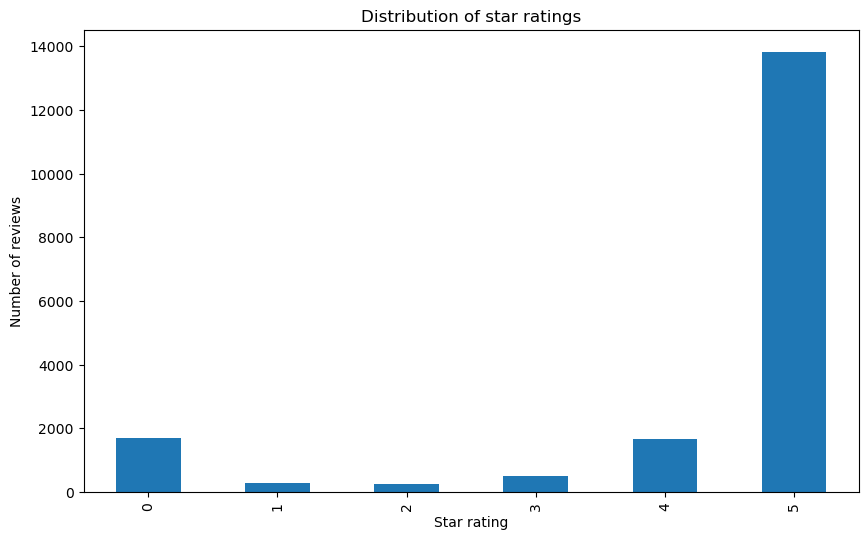

In [13]:
# 1.2 Analysis sentiment distribution in the dataset (star_rating)
plt.figure(figsize=(10, 6))
df['stars'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of star ratings')
plt.xlabel('Star rating')
plt.ylabel('Number of reviews')
plt.savefig('../reports/figures/Taks_3//star_rating_distribution.png')

KeyError: 'replay_count'

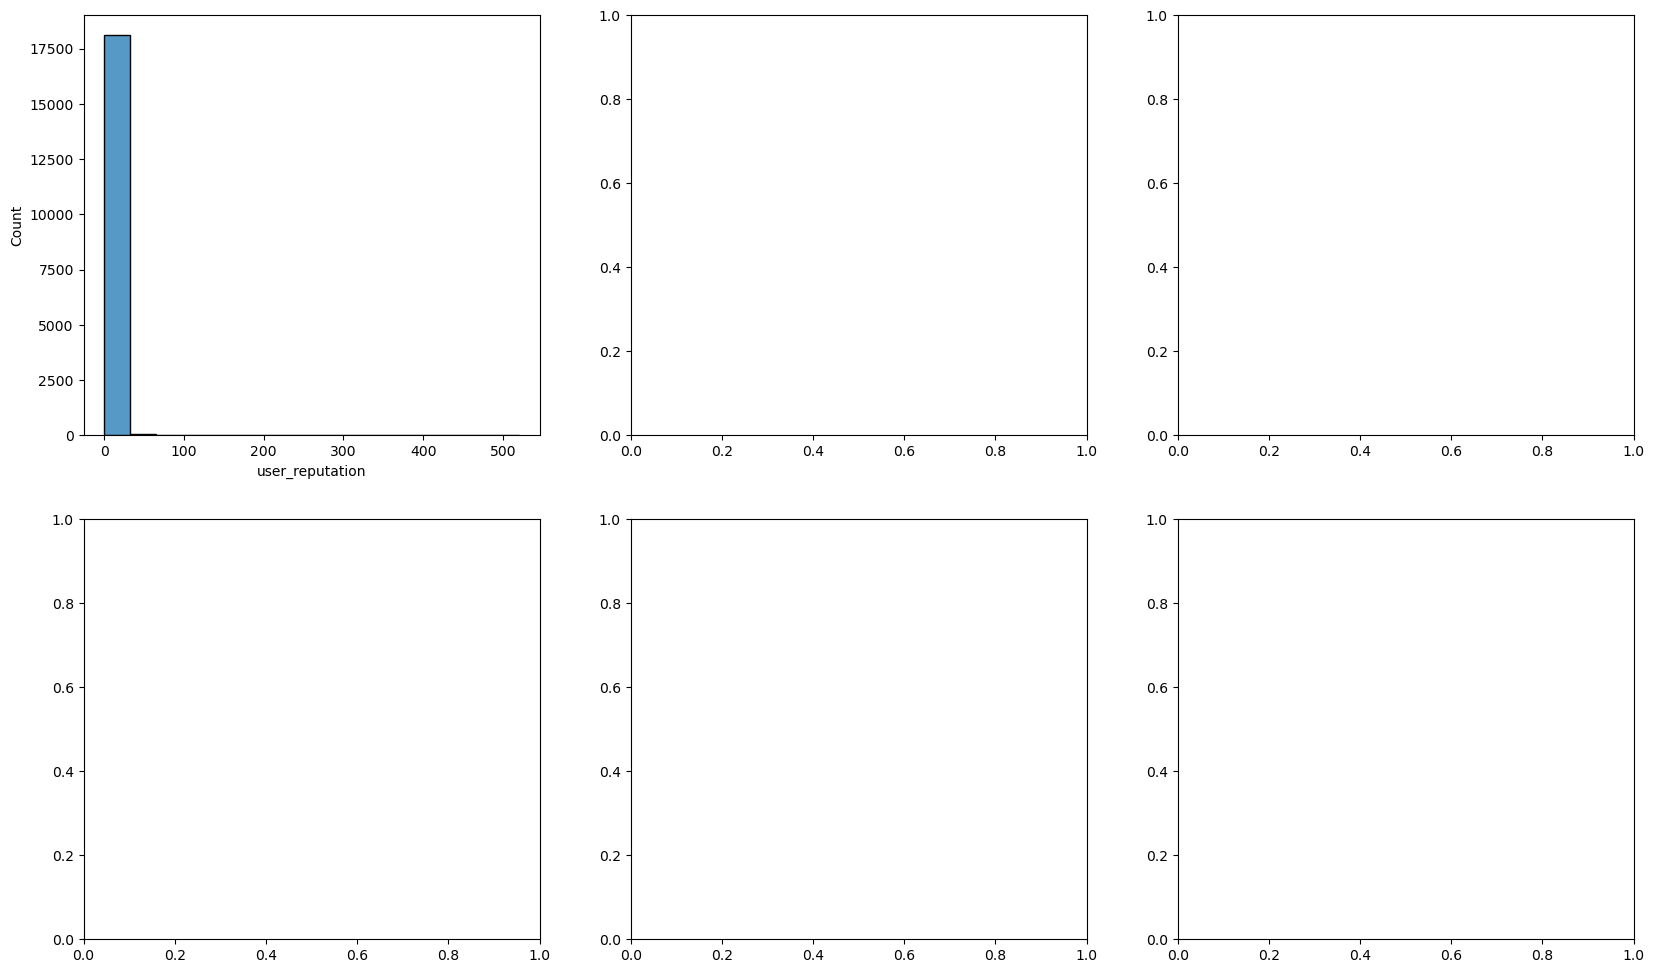

In [14]:
#1.4 numeric features distribution
numeric_features = ['user_reputation', 'replay_count', 'thumbs_up', 'thumbs_down', 'best_score']
fig, axes = plt.subplots(2,3, figsize=(20, 12))
for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], ax=axes[i//3, i%3])
plt.tight_layout()
plt.savefig('../reports/figures/Taks_3/numeric_features_distribution.png')
plt.close()

In [ ]:
# 1.5 Analyze top recipes

top_recipes = df['recipe_id'].value_counts().head(10)
plt.figure(figsize=(12,6))
top_recipes.plot(kind='bar')
plt.title('Top 10 recipes with most reviews')
plt.xlabel('Recipe ID')
plt.ylabel('Number of reviews')
plt.xticks(rotiation=45, ha='right')
plt.tight_layout()
plt.savefig('../reports/figures/Taks_3/top_recipes.png')
plt.close()